In [143]:
# Steps followed throughout
# 1. Predict through LR
# 2. Predict through ridge reg
# 3. Compare their coeff and r2 score
# 4. Compare for different alpha and LR
# 5. Plot a non linear dataset
# 6. Apply polynomial regression and then solve using ridge regression instead of LR to avoid overfitting or underfitting
# 7. Observe for different alpha
# 8. in together, generate a linear dataset and compare r2_score, coefficients and intercept using different alphas and linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_diabetes
data= load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [7]:
x= data.data
y= data.target

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=4)

# Using LR

In [9]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [10]:
lr.fit(x_train, y_train)

LinearRegression()

In [11]:
y_pred= lr.predict(x_test)

In [37]:
print('LR coeff',' ',lr.coef_)
print('LR intercept',' ',lr.intercept_)
lr.coef_.shape

LR coeff   [  33.40954056 -292.24112825  481.08002807  369.05716136 -966.32463944
  589.771093    232.59825938  288.32164654  802.69901575   37.81345763]
LR intercept   151.1466544656964


(10,)

In [28]:
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
print('r2 score:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))

r2 score: 0.461098899284209
mse: 2939.3581883941424


# Using Ridge regression

In [32]:
from sklearn.linear_model import Ridge

In [68]:
R1= Ridge(alpha=1000)

In [69]:
R1.fit(x_train, y_train)

Ridge(alpha=1000)

In [70]:
print('Ridge coeff',' ', R1.coef_)
print('Ridge intercept', ' ',R1.intercept_)

Ridge coeff   [ 0.27074908  0.02969139  0.75403194  0.6128247   0.28758425  0.21738454
 -0.50783679  0.57518998  0.76859663  0.46809114]
Ridge intercept   151.63166003734884


In [71]:
#the coeff using ridge regression is highly decreased but the intercept is slightly increased

In [79]:
y_pred_R1= R1.predict(x_test)

In [73]:
print('r2 score R1:', r2_score(y_test, y_pred_R1))
print('mse R1:', mean_squared_error(y_test, y_pred_R1))

r2 score R1: 0.00117967038815181
mse R1: 5447.921168985457


In [74]:
R2= Ridge(alpha=0.0000001)
R2.fit(x_train, y_train)

Ridge(alpha=1e-07)

In [78]:
y_pred_R2= R2.predict(x_test)


In [76]:
print(R2.coef_)
print(R2.intercept_)

[  33.4096667  -292.24097578  481.08018466  369.05705388 -966.31169492
  589.76106414  232.59229117  288.31965103  802.69413801   37.81341653]
151.14664937308675


In [77]:
print('r2 score R2:', r2_score(y_test, y_pred_R2))
print('mse R2:', mean_squared_error(y_test, y_pred_R2))

r2 score R2: 0.46109906644022136
mse R2: 2939.3572766658244


In [80]:
# alpha= 1000, r2_score low
#alpha= 0.00001, r2_score same as linear reg
#that means ridge reg works as linear reg when alpha low?

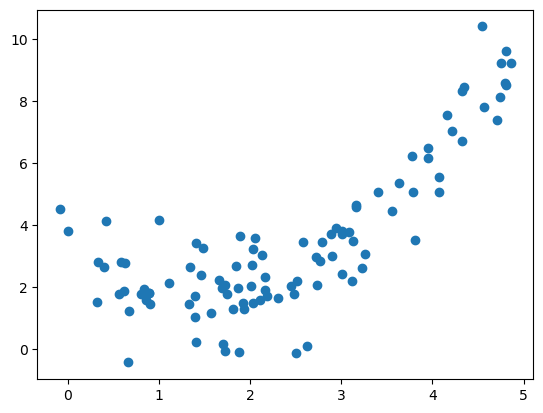

In [81]:
# creating non linear model
m= 100
x= 5 * np.random.rand(m,1) -0.1
y= 0.7 * (x**2) - 2*x + 3 + np.random.randn(m,1)

plt.scatter(x,y)
plt.show()

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.25766e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.26013e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


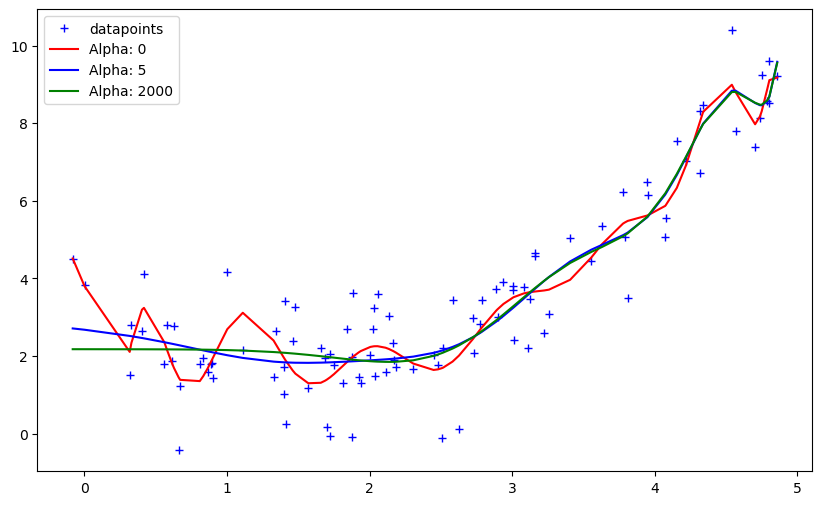

In [96]:
def get_preds_ridge(x,y,alpha):
    model= Pipeline([
        ('poly_feat', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha= alpha))
    ])
    model.fit(x,y)
    return model.predict(x)
    
alphas= [0,5,2000]
col= ['red', 'blue', 'green']

plt.figure(figsize=(10,6))
plt.plot(x,y, 'b+', label='datapoints')

for alpha, c in zip(alphas, col):
    preds= get_preds_ridge(x,y, alpha)
    plt.plot(sorted(x[:, 0]), preds[np.argsort(x[:, 0])], c, label='Alpha: {}'.format(alpha))
    
plt.legend()
plt.show()

In [ ]:
# red overfitting
#blue optimum
#green underfitting

# Comparison of LR and RR

In [109]:
# make own dataset with 1 i/p colm
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [118]:
X, Y= make_regression(n_features=1, n_targets=1, n_informative=1, n_samples=100, noise=20, random_state=13)


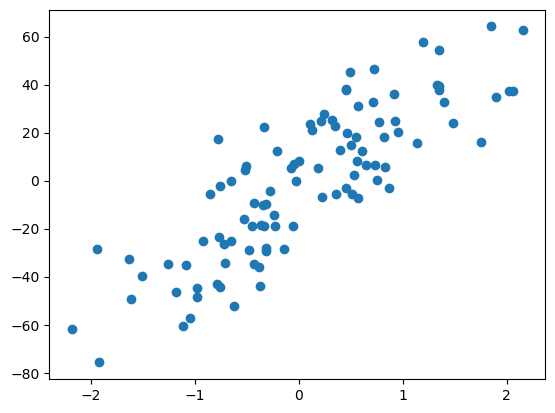

In [119]:
plt.scatter(X,y)

In [120]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=3)

In [139]:
lr= LinearRegression()
lr.fit(X_train, Y_train)

Y_pred_lr= lr.predict(X_test)
print('r2_score_lr:',r2_score(Y_test, Y_pred_lr))
print('lr_coef', lr.coef_)
print('lr_intercept', lr.intercept_)

r2_score_lr: 0.7607033878525122
lr_coef [26.62094169]
lr_intercept -3.2823075992005086


In [140]:
#alpha= 0.1

rr= Ridge(alpha= 0.01)
rr.fit(X_train, Y_train)

Y_pred_rr= rr.predict(X_test)
print('r2_score_rr', r2_score(Y_test, Y_pred_rr))
print('rr_coef', rr.coef_)
print('rr_intercept',rr.intercept_)

r2_score_rr 0.7606724643562706
rr_coef [26.61677662]
rr_intercept -3.2820435781181128


In [141]:
# alpha= 10

rr1= Ridge(alpha= 10)
rr1.fit(X_train, Y_train)

Y_pred_rr1= rr1.predict(X_test)
print('r2_score_rr1', r2_score(Y_test, Y_pred_rr1))
print('rr1_coef', rr1.coef_)
print('rr1_intercept',rr1.intercept_)

r2_score_rr1 0.7233828653517227
rr1_coef [23.01888318]
rr1_intercept -3.053975275626585


In [142]:
# alpha= 1000

rr2= Ridge(alpha= 1000)
rr2.fit(X_train, Y_train)

Y_pred_rr2= rr2.predict(X_test)
print('r2_score_rr2', r2_score(Y_test, Y_pred_rr2))
print('rr2_coef', rr2.coef_)
print('rr2_intercept',rr2.intercept_)

r2_score_rr2 0.06402880710380066
rr2_coef [1.59902087]
rr2_intercept -1.6961830806729048
